Accuracy : 0.9666666666666667
[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


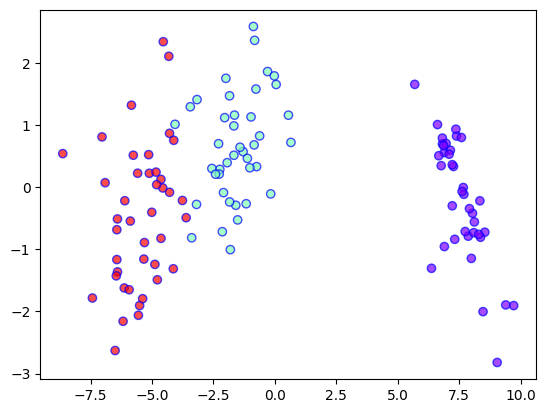

In [1]:
# example
# necessary import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# load the iris dataset
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,
                       data=iris.data)
dataset['target'] = iris.target

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, \
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

# apply linear discriminant analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

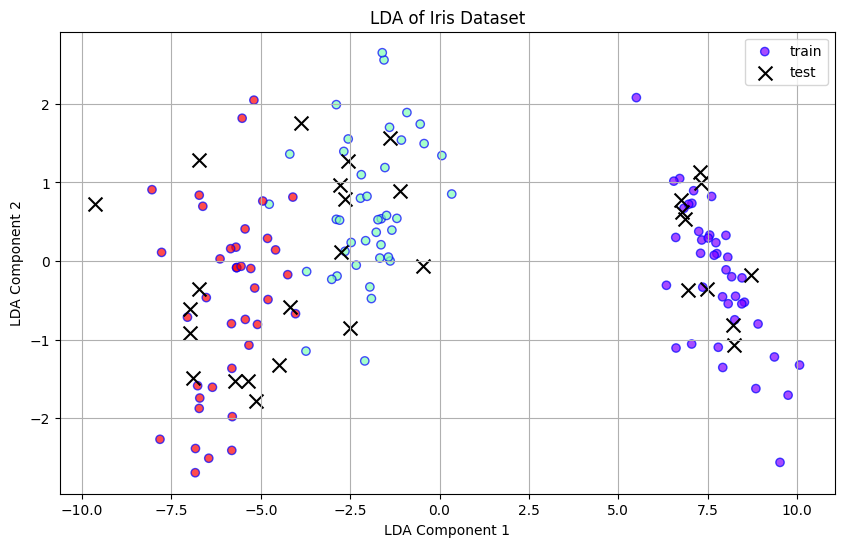

Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names, data=iris.data)
dataset["target"] = iris.target

X = dataset.iloc[:, 0:4].values
y = dataset["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

plt.figure(figsize=(10, 6))

plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap="rainbow",
            alpha=0.7, edgecolors="b", label="train")

plt.scatter(X_test_lda[:, 0], X_test_lda[:, 1], c="black", marker="x",
            s=100, label="test")

plt.title("LDA of Iris Dataset")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend()
plt.grid()
plt.show()

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_lda, y_train)
y_pred = classifier.predict(X_test_lda)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_m)